In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from predictor import Predictor

# Запись данных

Здесь в примере данные записывюатся из json-файла, но код можно переписать и подавать сообщения из Kafka

In [2]:
model = Predictor()
# load data to model
import json

with open('data.json', 'r') as f:
    data = json.load(f)

for timestamp in data:
    model.write_mes(timestamp)

Пример сообщения

In [3]:
#print(data[0])

# Подбор параметров
После того как загружено достаточное число данных можно запустить метод, чтобы подобрать коэфиценты тренда или любой другой имплеменитрвоанной модели

In [4]:
model.fit(n_days=30)

# Предсказание
После того как были заданы предупредительные значения для вибраций, можно запустить метод для предсказания даты выхода из строя. 

Важно!
 - В качестве даты выхода для каждого подшипника будет передана наискорейшая дата по всем вибрациям (горизонт, верт и аксиальные)
 - Дата прогнозируется только для тех подшипников, для которых есть амлитуда вибраций в Kafka

 Выходные данные:

 Словарь, ключ - индекс подшипника, 
 значение - (delta-время в днях с 2022.01.01 00:00 , ошибка по времени в днях, причина отказа (ключ для вибраций))

In [5]:
model.predict_linear()

{0: (842.5533510284351, 14.41499569573159, 'Vibration_axis'),
 1: (691.907722261328, 8.489383491116339, 'Vibration_axis'),
 6: (474.5146865728637, 3.082225755828165, 'Vibration_axis'),
 7: (460.4029877221352, 4.187229810951695, 'Vibration_axis')}

# Визуализация данных
это уже просто как пример что можно и обращаться к функции тренда в модели явно для потсроения графиков

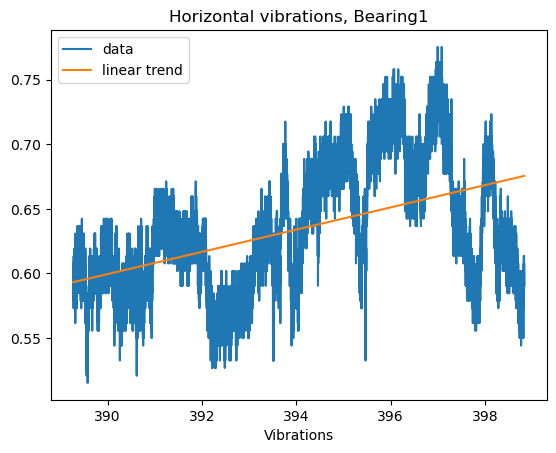

In [6]:
plt.title('Horizontal vibrations, Bearing1')

plt.plot(model.t, model.data_value[0]['Vibration_horizntal'], label='data')

t_pred = np.array([model.t[0], model.t[-1]])

plt.plot(t_pred, model.trend_linear(t_pred, 'Vibration_horizntal', 0), label='linear trend')
plt.legend()
plt.xlabel('days')
plt.xlabel('Vibrations')
plt.show()